# Import Libraries 

In [ ]:
# !pip install ipython-autotime
# %load_ext autotime

In [ ]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

import time
# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn'
import seaborn as sns

# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places

#pd.options.display.float_format = '{:.6f}'.format

#from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel
#from sklearn.neighbors import NearestNeighbors
#from sklearn.decomposition import TruncatedSVD
#from sklearn.decomposition import PCA
#from sklearn.cluster import KMeans
#from sklearn.metrics import silhouette_score


# Import dataset

In [ ]:
# aniList = pd.read_csv(io.BytesIO(uploaded['AnimeList.csv']))
url = 'https://raw.githubusercontent.com/Ninelie-Nananai/AnimeListApi/main/AnimeList.csv'
aniList = pd.read_csv(url)
data = aniList.copy()
data2 = aniList.copy()

# Feature นำเข้า  *****


In [ ]:
data2.head()

anime_id                title              title_english title_japanese  \
0     11013        Inu x Boku SS  Inu X Boku Secret Service         妖狐×僕SS   
1      2104     Seto no Hanayome      My Bride is a Mermaid          瀬戸の花嫁   
2      5262   Shugo Chara!! Doki         Shugo Chara!! Doki    しゅごキャラ！！どきっ   
3       721        Princess Tutu              Princess Tutu      プリンセスチュチュ   
4     12365  Bakuman. 3rd Season                   Bakuman.          バクマン。   

                                  title_synonyms  \
0                                Youko x Boku SS   
1                           The Inland Sea Bride   
2  Shugo Chara Ninenme, Shugo Chara! Second Year   
3                                            NaN   
4                               Bakuman Season 3   

                                           image_url type    source  episodes  \
0  https://myanimelist.cdn-dena.com/images/anime/...   TV     Manga        12   
1  https://myanimelist.cdn-dena.com/images/anime/...   TV     Manga        26   
2  https://myanimelist.cdn-dena.com/images/anime/...   TV     Manga        51   
3  https://myanimelist.cdn-dena.com/images/anime/...   TV  Original        38   
4  https://myanimelist.cdn-dena.com/images/anime/...   TV     Manga        25   

            status  airing                  aired_string  \
0  Finished Airing   False  Jan 13, 2012 to Mar 30, 2012   
1  Finished Airing   False    Apr 2, 2007 to Oct 1, 2007   
2  Finished Airing   False   Oct 4, 2008 to Sep 25, 2009   
3  Finished Airing   False  Aug 16, 2002 to May 23, 2003   
4  Finished Airing   False   Oct 6, 2012 to Mar 30, 2013   

                                        aired         duration  \
0  {'from': '2012-01-13', 'to': '2012-03-30'}  24 min. per ep.   
1  {'from': '2007-04-02', 'to': '2007-10-01'}  24 min. per ep.   
2  {'from': '2008-10-04', 'to': '2009-09-25'}  24 min. per ep.   
3  {'from': '2002-08-16', 'to': '2003-05-23'}  16 min. per ep.   
4  {'from': '2012-10-06', 'to': '2013-03-30'}  24 min. per ep.   

                      rating  score  scored_by    rank  popularity  members  \
0  PG-13 - Teens 13 or older   7.63     139250  1274.0         231   283882   
1  PG-13 - Teens 13 or older   7.89      91206   727.0         366   204003   
2              PG - Children   7.55      37129  1508.0        1173    70127   
3  PG-13 - Teens 13 or older   8.21      36501   307.0         916    93312   
4  PG-13 - Teens 13 or older   8.67     107767    50.0         426   182765   

   favorites                                         background    premiered  \
0       2809  Inu x Boku SS was licensed by Sentai Filmworks...  Winter 2012   
1       2579                                                NaN  Spring 2007   
2        802                                                NaN    Fall 2008   
3       3344  Princess Tutu aired in two parts. The first pa...  Summer 2002   
4       2082                                                NaN    Fall 2012   

            broadcast                                            related  \
0  Fridays at Unknown  {'Adaptation': [{'mal_id': 17207, 'type': 'man...   
1             Unknown  {'Adaptation': [{'mal_id': 759, 'type': 'manga...   
2             Unknown  {'Adaptation': [{'mal_id': 101, 'type': 'manga...   
3  Fridays at Unknown  {'Adaptation': [{'mal_id': 1581, 'type': 'mang...   
4             Unknown  {'Adaptation': [{'mal_id': 9711, 'type': 'mang...   

                                            producer          licensor  \
0  Aniplex, Square Enix, Mainichi Broadcasting Sy...  Sentai Filmworks   
1                  TV Tokyo, AIC, Square Enix, Sotsu        Funimation   
2                                    TV Tokyo, Sotsu               NaN   
3                 Memory-Tech, GANSIS, Marvelous AQL         ADV Films   
4                                      NHK, Shueisha               NaN   

             studio                                     genre  \
0  David Production    Comedy, Supernatural, Romance,

In [ ]:
data2.columns

Index(['anime_id', 'title', 'title_english', 'title_japanese',
       'title_synonyms', 'image_url', 'type', 'source', 'episodes', 'status',
       'airing', 'aired_string', 'aired', 'duration', 'rating', 'score',
       'scored_by', 'rank', 'popularity', 'members', 'favorites', 'background',
       'premiered', 'broadcast', 'related', 'producer', 'licensor', 'studio',
       'genre', 'opening_theme', 'ending_theme'],
      dtype='object')

# Observe data

ตรวจดูข้อมูลว่ามีกี่ column Type อะไรบ้าง ก่อนนำไปเข้า model

In [ ]:
aniList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14478 entries, 0 to 14477
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   anime_id        14478 non-null  int64  
 1   title           14478 non-null  object 
 2   title_english   5724 non-null   object 
 3   title_japanese  14443 non-null  object 
 4   title_synonyms  8937 non-null   object 
 5   image_url       14382 non-null  object 
 6   type            14478 non-null  object 
 7   source          14478 non-null  object 
 8   episodes        14478 non-null  int64  
 9   status          14478 non-null  object 
 10  airing          14478 non-null  bool   
 11  aired_string    14478 non-null  object 
 12  aired           14478 non-null  object 
 13  duration        14478 non-null  object 
 14  rating          14478 non-null  object 
 15  score           14478 non-null  float64
 16  scored_by       14478 non-null  int64  
 17  rank            12904 non-null 

In [ ]:
aniList.isna().sum()

anime_id              0
title                 0
title_english      8754
title_japanese       35
title_synonyms     5541
image_url            96
type                  0
source                0
episodes              0
status                0
airing                0
aired_string          0
aired                 0
duration              0
rating                0
score                 0
scored_by             0
rank               1574
popularity            0
members               0
favorites             0
background        13421
premiered         10382
broadcast         10207
related               0
producer           6190
licensor          11105
studio             5934
genre                64
opening_theme         0
ending_theme          0
dtype: int64

In [ ]:
(aniList.isna().sum()/aniList.shape[0])

# มีข้อมูลที่เป็น null ไม่ถึง 1%

anime_id          0.000000
title             0.000000
title_english     0.604642
title_japanese    0.002417
title_synonyms    0.382719
image_url         0.006631
type              0.000000
source            0.000000
episodes          0.000000
status            0.000000
airing            0.000000
aired_string      0.000000
aired             0.000000
duration          0.000000
rating            0.000000
score             0.000000
scored_by         0.000000
rank              0.108717
popularity        0.000000
members           0.000000
favorites         0.000000
background        0.926993
premiered         0.717088
broadcast         0.705001
related           0.000000
producer          0.427545
licensor          0.767026
studio            0.409863
genre             0.004421
opening_theme     0.000000
ending_theme      0.000000
dtype: float64

### EDA

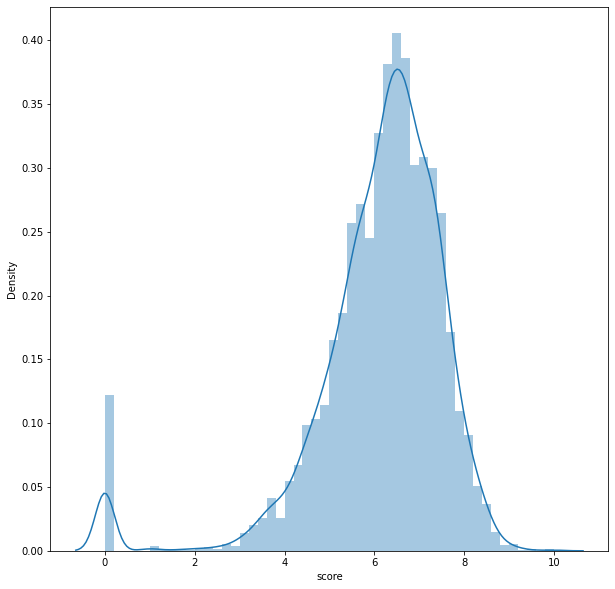

In [ ]:
# score ใน dataset นี้

plt.figure(figsize=(10,10))
sns.distplot(aniList['score']);

คะแนนที่เยอะที่สุดจะอยู่ระหว่าง 5-7 คะแนน
น้อยสุด 1-3 และ 9-10

0 คะแนนมีค่อนข้างเยอะเพราะใน dataset นี้รวม anime ที่ไม่ได้เป็นทางการเข้าไปด้วย (doujin, มังงะจากเว็ป, ทางบ้านเขียนเอง)

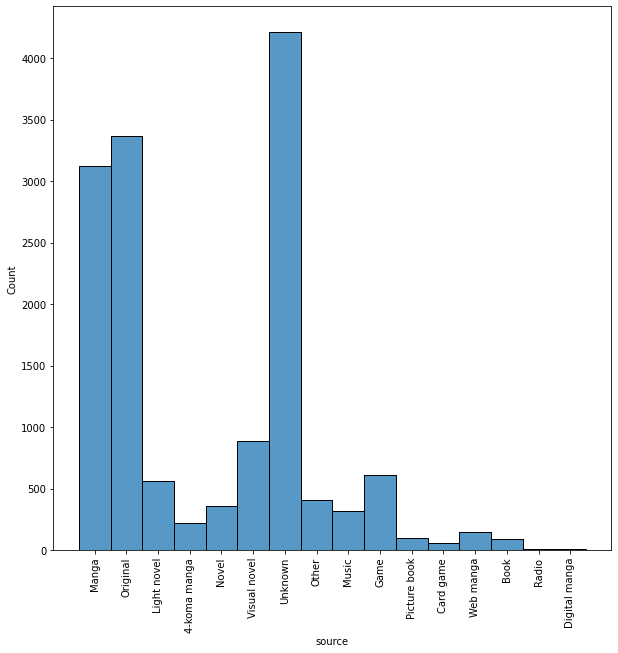

In [ ]:
# จำนวนของ source (ที่มา) ทั้งหมดที่มีใน dataset

plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.histplot(aniList, x='source');

### อันดับ 3 Source ที่เยอะที่สุด
1. อันดับ 1 Unknown (เป็นอนิเมะที่ไม่เป็นทางการ ประเภท Doujin ที่ทำขึ้นมาเองไม่ได้ผ่านบริษัท หรือ Indie)
2. อันดับ 2 Original (สร้างโดยบริษัทผลิตอนิเมะเอง ไม่ได้สร้างหรืออ้างอิงจาก Manga หรือ Novel)
3. อันดับ 3 Manga (สร้างจาก Manga)

อันดับทุดท้าย(น้อยสุด) Radio = 9 , และ Digital Manga = 10

# Unknown คือเรื่องอะไร

In [ ]:
percentUnknown = (aniList['source'].loc[aniList['source'] == 'Original'].count() / aniList['source'].count()) * 100
print(f"source(ที่มา) ของ Unknown เมื่อคิดเป็นเปอร์เข็นต์จากทั้งหมด {percentUnknown} %")

source(ที่มา) ของ Unknown เมื่อคิดเป็นเปอร์เข็นต์จากทั้งหมด 23.262881613482524 %


In [ ]:
WhatIsUnknownType = aniList.loc[aniList['type'] == 'Unknown']
WhatIsUnknownType[['title', 'type', 'genre', 'studio', 'producer', 'source']].head(10)

title     type  \
187                                  Sidonia no Kishi 3  Unknown   
511      Fate/Extra: Last Encore - Irusterias Tendouron  Unknown   
1396                                    Hatena☆Illusion  Unknown   
1989                                      Kenja no Mago  Unknown   
2326     Soukyuu no Fafner: Dead Aggressor - The Beyond  Unknown   
2456                                      Kengan Ashura  Unknown   
3235                             Ginga Jinpuu Jinraiger  Unknown   
3292  Watashi, Nouryoku wa Heikinchi de tte Itta yo ne!  Unknown   
3836                            Gi(a)rlish Number Shura  Unknown   
4064                                          Ten Count  Unknown   

                                       genre      studio    producer  \
187     Action, Sci-Fi, Space, Mecha, Seinen         NaN         NaN   
511                   Action, Magic, Fantasy         NaN         NaN   
1396    Comedy, Supernatural, Romance, Ecchi         NaN         NaN   
1989          Action, Comedy, Magic, Fantasy         NaN         NaN   
2326  Action, Military, Sci-Fi, Drama, Mecha  Xebec Zwei         NaN   
2456                    Action, Martial Arts         NaN         NaN   
3235                Action, Adventure, Mecha         NaN  Studio GDW   
3292                         Comedy, Fantasy         NaN         NaN   
3836                          Comedy, Parody         NaN         NaN   
4064                    Drama, Romance, Yaoi         NaN         NaN   

            source  
187          Manga  
511           Game  
1396   Light novel  
1989   Light novel  
2326      Original  
2456         Manga  
3235      Original  
3292   Light novel  
3836  4-koma manga  
4064         Manga

### **เป็นอนิเมะที่ไม่เป็นทางการ ประเภท Doujin ที่ทำขึ้นมาเองไม่ได้ผ่านบริษัท เช่น Indie ทางบ้านเขียนขึ้นมาเอง Manga บน Website**



In [ ]:
tmpSourceList = []

for i in aniList["source"]:
    # print(str(i))
    x = str(i).split(", ")
    # print(x)
    for n in x:
        # if n not in tmpGenreList:
        tmpSourceList.append(n)

In [ ]:

dictSource = {}

for x in tmpSourceList:
    if x in dictSource.keys():
        dictSource[x] = int(dictSource[x])+1
    else:
        dictSource[x] = 1
        
dictSource   

{'Manga': 3120,
 'Original': 3368,
 'Light novel': 563,
 '4-koma manga': 224,
 'Novel': 359,
 'Visual novel': 888,
 'Unknown': 4210,
 'Other': 408,
 'Music': 314,
 'Game': 607,
 'Picture book': 96,
 'Card game': 59,
 'Web manga': 150,
 'Book': 93,
 'Radio': 9,
 'Digital manga': 10}

# จำนวนของ type ทั้งหมดที่มีใน dataset

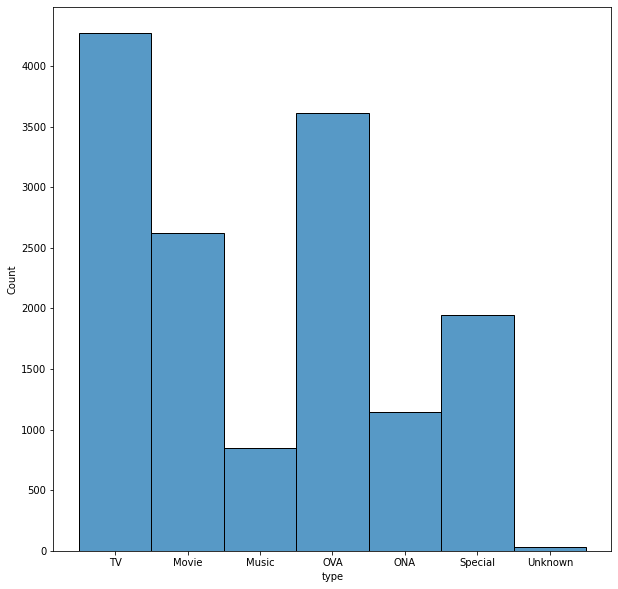

In [ ]:
# จำนวนของ type ทั้งหมดที่มีใน dataset

plt.figure(figsize=(10,10))
sns.histplot(aniList, x='type');

### 3 อันดับ Type ที่เยอะที่สุด
1. TV (เพราะอนิเมะในญี่ปุ่นฉายผ่าน TV เป็นหลัก แล้วค่อยนำออกมาขายผ่าน DVD หรือ Blu-ray)
2. OVA (ตอนพิเศษของอนิเมะที่ส่วนมากไม่เกี่ยวกับเนื้อเรื่อง)
3. Movie (ฉายในโรงหนัง)
-
4. Unknown น้อยที่สุด

In [ ]:
tmpGenreList = []

for i in aniList["genre"]:
    # print(str(i))
    x = str(i).split(", ")
    # print(x)
    for n in x:
        # if n not in tmpGenreList:
        tmpGenreList.append(n)

In [ ]:

dictGenre = {}

for x in tmpGenreList:
    if x in dictGenre.keys():
        dictGenre[x] = int(dictGenre[x])+1
    else:
        dictGenre[x] = 1
        
dictGenre    

{'Comedy': 5251,
 'Supernatural': 1219,
 'Romance': 1634,
 'Shounen': 1771,
 'Parody': 540,
 'School': 1406,
 'Magic': 921,
 'Shoujo': 643,
 'Drama': 2294,
 'Fantasy': 2703,
 'Kids': 2003,
 'Action': 3253,
 'Music': 1351,
 'Slice of Life': 1532,
 'Josei': 81,
 'Harem': 353,
 'Shounen Ai': 79,
 'Adventure': 2582,
 'Super Power': 533,
 'Sci-Fi': 2272,
 'Ecchi': 685,
 'Seinen': 698,
 'Martial Arts': 310,
 'Game': 290,
 'Sports': 624,
 'Demons': 373,
 'Historical': 958,
 'Horror': 413,
 'Mystery': 606,
 'Samurai': 175,
 'Hentai': 1218,
 'Space': 436,
 'Mecha': 1009,
 'Psychological': 288,
 'Police': 221,
 'Vampire': 125,
 'Military': 487,
 'Thriller': 100,
 'nan': 64,
 'Yaoi': 39,
 'Cars': 92,
 'Shoujo Ai': 67,
 'Dementia': 293,
 'Yuri': 41}

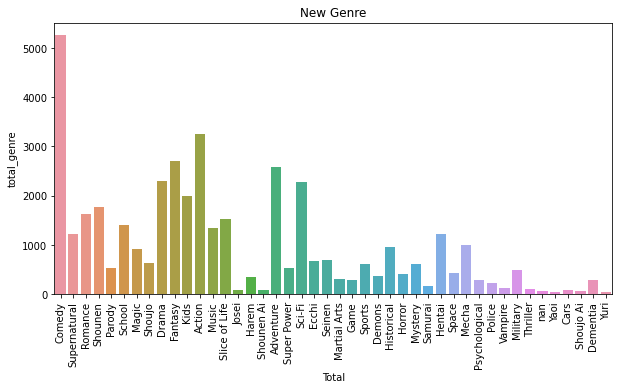

In [ ]:
# newGenre = pd.DataFrame(data=dictGenre.keys(),columns=['genre'])
# newGenre = pd.DataFrame(data=dictGenre.values(),columns=['total_genre'])

newGenre = pd.DataFrame({ 'genre': dictGenre.keys(), 'total_genre': dictGenre.values() })

plt.figure(figsize=(10,5))
sns.barplot(newGenre['genre'],newGenre['total_genre'])
plt.xticks(rotation=90)
plt.title('New Genre')
plt.xlabel('Total')
plt.show()

### 3 อันดับ Genre ที่เยอะที่สุด
1. Comedy
2. Action
3. Fantasy

อันดับสุดท้าย น้อยสุด Yaoi = 39 , และ Yuri = 41

In [ ]:
newGenre.sort_values("total_genre", ascending=True)

genre  total_genre
39           Yaoi           39
43           Yuri           41
38            nan           64
41      Shoujo Ai           67
16     Shounen Ai           79
14          Josei           81
40           Cars           92
37       Thriller          100
35        Vampire          125
29        Samurai          175
34         Police          221
33  Psychological          288
23           Game          290
42       Dementia          293
22   Martial Arts          310
15          Harem          353
25         Demons          373
27         Horror          413
31          Space          436
36       Military          487
18    Super Power          533
4          Parody          540
28        Mystery          606
24         Sports          624
7          Shoujo          643
20          Ecchi          685
21         Seinen          698
6           Magic          921
26     Historical          958
32          Mecha         1009
30         Hentai         1218
1    Supernatural         1219
12          Music         1351
5          School         1406
13  Slice of Life         1532
2         Romance         1634
3         Shounen         1771
10           Kids         2003
19         Sci-Fi         2272
8           Drama         2294
17      Adventure         2582
9         Fantasy         2703
11         Action         3253
0          Comedy         5251

In [ ]:
TopTenAnime = aniList.loc[aniList['rank']> 0.0]
TopTenAnime[['rank', 'title', 'score']].sort_values('rank', ascending=True).head(10)

rank                             title  score
2555    1.0  Fullmetal Alchemist: Brotherhood   9.25
1028    2.0                    Kimi no Na wa.   9.19
1252    3.0                          Gintama°   9.15
6177    4.0                     Steins;Gate 0   9.15
2999    5.0                       Steins;Gate   9.14
12724   6.0              Ginga Eiyuu Densetsu   9.11
8992    7.0                     Gintama&#039;   9.11
418     8.0            Hunter x Hunter (2011)   9.11
1307    9.0        3-gatsu no Lion 2nd Season   9.10
5783   10.0          Gintama&#039;: Enchousen   9.07

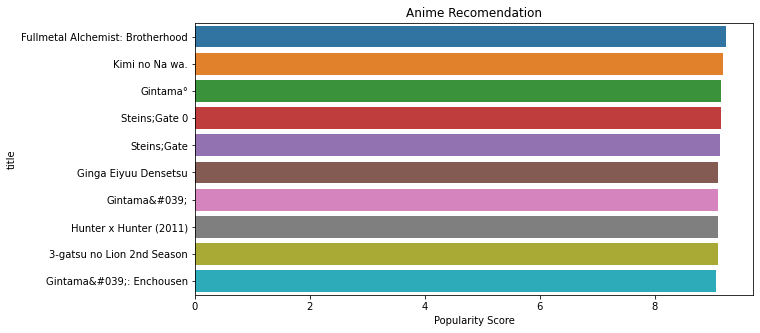

In [ ]:
tmpTopTenAnime=TopTenAnime[['rank', 'title', 'score']].sort_values('rank', ascending=True).head(10)
plt.figure(figsize=(10,5))
sns.barplot(tmpTopTenAnime['score'],tmpTopTenAnime['title'])
plt.title('Anime Recomendation')
plt.xlabel('Popularity Score')
plt.show()

### 5 อันดับ อนิเมะที่ได้รับความนิยมมากที่สุด
1. Fullmetal Alchemist: Brotherhood
2. Kimi no Na wa.
3. Gintama
4. Steins;Gate 0
5. Steins;Gate

In [ ]:
TopTenAnime[['title', 'score','scored_by']].loc[TopTenAnime['title'] == "Steins;Gate"].head()

title  score  scored_by
2999  Steins;Gate   9.14     563857

In [ ]:
TopTenAnime[['title', 'score', 'scored_by']].loc[TopTenAnime['title'] == "Gintama°"].head()

title  score  scored_by
1252  Gintama°   9.15      71751

เมื่อลอง head ออกมา จะเห็นว่า Steins;Gate มีคะแนน 9.14 ซึงน้อยกว่า Gintama 0.01 คะแนนแต่ คนที่โหวดให้ Ginnama กับมีน้อยกว่า Steins;Gate

In [ ]:

rating1 = data2[['anime_id','title', 'genre','scored_by','score']]
rating1.drop_duplicates(subset=['anime_id'],inplace=True)
rating1.reset_index(drop=True,inplace=True)

rating1.shape

(14478, 5)

In [ ]:
# ค่าเฉลี่ยนของคะแนนโดยรวม
C = rating1['score'].mean()

# เรื่องที่มีอัตราการนับคะแนนโดยรวมมากกว่า 85%
m = rating1['scored_by'].quantile(0.85)
print('m: ', m, 'C: ', C)

m:  12584.449999999999 C:  6.142481696366902


In [ ]:
def Iighted_rating(x, m=m, C=C):
    v = x['scored_by']
    R = x['score']
    return (v/(v+m) * R) + (m/(m+v) * C)

    # คำนวณ

In [ ]:
# animes having total rate count greater than 85% is considered into lists_animes
lists_animes =rating1.copy().loc[rating1['scored_by'] >= m]

lists_animes['trusted_score'] = lists_animes.apply(Iighted_rating, axis=1)
lists_animes = lists_animes.sort_values('trusted_score', ascending=False)

lists_animes.shape

(2172, 6)

In [ ]:
# TOP 10 Most popular anime by trusted score
lists_animes[['title', 'genre', 'scored_by', 'score', 'trusted_score']].head(10)

title  \
2555                    Fullmetal Alchemist: Brotherhood   
1028                                      Kimi no Na wa.   
2999                                         Steins;Gate   
418                               Hunter x Hunter (2011)   
6572                                      Koe no Katachi   
2783                                Clannad: After Story   
7403                  Code Geass: Hangyaku no Lelouch R2   
7105                       Sen to Chihiro no Kamikakushi   
11640                            Shigatsu wa Kimi no Uso   
6511   Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...   

                                                   genre  scored_by  score  \
2555   Action, Military, Adventure, Comedy, Drama, Ma...     733592   9.25   
1028                Supernatural, Drama, Romance, School     471398   9.19   
2999                                    Thriller, Sci-Fi     563857   9.14   
418              Action, Adventure, Super Power, Shounen     403377   9.11   
6572                              Drama, School, Shounen     296261   9.04   
2783   Slice of Life, Comedy, Supernatural, Drama, Ro...     363239   9.01   
7403   Action, Military, Sci-Fi, Super Power, Drama, ...     543904   8.95   
7105                      Adventure, Supernatural, Drama     498602   8.92   
11640             Drama, Music, Romance, School, Shounen     413527   8.88   
6511              Comedy, Sports, Drama, School, Shounen     157934   8.99   

       trusted_score  
2555        9.197591  
1028        9.110759  
2999        9.074560  
418         9.020221  
6572        8.921936  
2783        8.913981  
7403        8.886511  
7105        8.851623  
11640       8.799152  
6511        8.779850

### อันดับจริงๆ ของอนิเมะแต่ละเรื่องคำนวณจาก คนที่มาโหวดด้วย

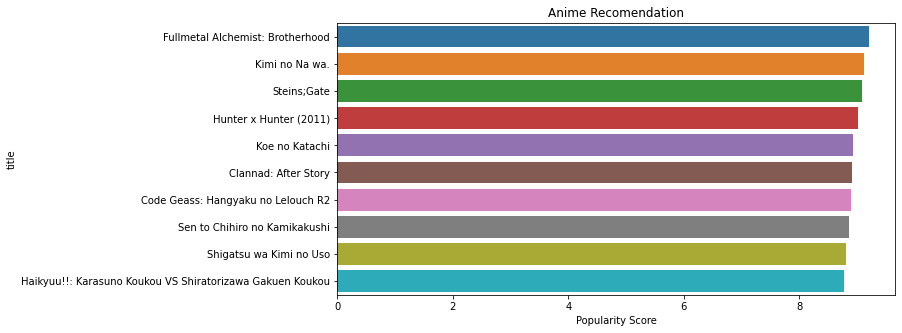

In [ ]:
pop=lists_animes[['title', 'scored_by', 'score', 'trusted_score']].head(10)
plt.figure(figsize=(10,5))
sns.barplot(pop['trusted_score'],pop['title'])
plt.title('Anime Recomendation')
plt.xlabel('Popularity Score')
plt.show()


จะเห็นว่าต่างจากก่อนหน้า เมื่อนำจำนวนคนที่มาโหวดด้วย

ก่อน
1. Fullmetal Alchemist: Brotherhood
2. Kimi no Na wa.
3. Gintama
4. Steins;Gate 0
5. Steins;Gate

หลัง
1. Fullmetal Alchemist: Brotherhood
2. Kimi no Na wa.
3. Steins;Gate
4. Hunter x Hunter (2011)
5. Koe no Katachi

### **Content Based Recomendation**

In [ ]:
lists_animes.head()

anime_id                             title  \
2555      5114  Fullmetal Alchemist: Brotherhood   
1028     32281                    Kimi no Na wa.   
2999      9253                       Steins;Gate   
418      11061            Hunter x Hunter (2011)   
6572     28851                    Koe no Katachi   

                                                  genre  scored_by  score  \
2555  Action, Military, Adventure, Comedy, Drama, Ma...     733592   9.25   
1028               Supernatural, Drama, Romance, School     471398   9.19   
2999                                   Thriller, Sci-Fi     563857   9.14   
418             Action, Adventure, Super Power, Shounen     403377   9.11   
6572                             Drama, School, Shounen     296261   9.04   

      trusted_score  
2555       9.197591  
1028       9.110759  
2999       9.074560  
418        9.020221  
6572       8.921936

In [ ]:
def combine_string(row):
  res = [str(r) for r in row]
  return ' | '.join(res)
  # ฟังก์ชัน combine string

In [ ]:
data3=aniList.copy()

cb = ['title', 'genre','type','studio','source'] # 

data3['describe'] = data3[cb].apply(combine_string,axis = 1)
#data3['describe'].fillna(' ')

#data3.head()

# สร้าง dataset ใหม่ ชื่อ data3 และเพิ่ม column ใหม่คือ describe ซึ่งเอา genre type episodes มาผสมกัน

# considering the anime content
#data3['describe']=data3['genre'],data3['type'],data3['episodes']
#data3['describe'].fillna(' ')
#data3.head()

In [ ]:
data3.drop_duplicates(subset=['title'],inplace=True)
# ดรอปตัวซ้ำ

In [ ]:
data3.shape
# row, col check

(14477, 32)

In [ ]:
data3.reset_index(drop=True,inplace=True)

### **Feature Engineering**

*   TfidfVectorizer คือ algorithm ที่เลือกใช้ ซึ่งจะช่วยเราจัดการกับข้อความ Eng 
*   จะคืนค่ามาเป็น matrix ซึ่งแทนความใกล้เคียงกันของข้อมูลที่เราเปรียบเทียบ





In [ ]:
tf = TfidfVectorizer(ngram_range=(1,2), stop_words='english')
tf_matrix = tf.fit_transform(data3['describe'])

test_simil = cosine_similarity(tf_matrix,tf_matrix)

id=data3['anime_id'].values

test_simil = pd.DataFrame(test_simil, index=id, columns=id)

test_simil.columns = data3['title']

test_simil['anime_name'] = data3['title'].values

test_simil.head()
#tf_matrix.shape

title  Inu x Boku SS  Seto no Hanayome  Shugo Chara!! Doki  Princess Tutu  \
11013       1.000000          0.071516            0.017910       0.022368   
2104        0.071516          1.000000            0.035241       0.025183   
5262        0.017910          0.035241            1.000000       0.026207   
721         0.022368          0.025183            0.026207       1.000000   
12365       0.129254          0.085567            0.021429       0.068717   

title  Bakuman. 3rd Season  Yume-iro Pâtissière  Ultra Maniac  \
11013             0.129254             0.012242      0.053850   
2104              0.085567             0.027996      0.083755   
5262              0.021429             0.103675      0.140814   
721               0.068717             0.005333      0.040640   
12365             1.000000             0.014647      0.038738   

title  Shakugan no Shana II (Second)  Nodame Cantabile: Paris-hen  \
11013                       0.031127                     0.027678   
2104                        0.061166                     0.031161   
5262                        0.018020                     0.016165   
721                         0.032921                     0.020188   
12365                       0.106741                     0.150783   

title  Ouran Koukou Host Club  Junjou Romantica 2  Kaichou wa Maid-sama!  \
11013                0.027233            0.096182               0.031748   
2104                 0.070448            0.052526               0.082128   
5262                 0.103633            0.019930               0.120815   
721                  0.019864            0.063911               0.023157   
12365                0.032584            0.202048               0.172958   

title  Sekaiichi Hatsukoi 2  Tonari no Kaibutsu-kun    Bleach   Chobits  \
11013              0.097220                0.029831  0.079876  0.036834   
2104               0.053093                0.077168  0.069616  0.041469   
5262               0.020145                0.113519  0.021689  0.021512   
721                0.064601                0.021759  0.012730  0.068984   
12365              0.204228                0.035692  0.073983  0.137944   

title  Kimi ni Todoke  Naruto: Shippuuden   Ranma ½  Toradora!  \
11013        0.091715            0.053260  0.022236   0.030682   
2104         0.079932            0.059962  0.025034   0.093009   
5262         0.121236            0.018682  0.021877   0.031661   
721          0.029203            0.010965  0.058591   0.029189   
12365        0.082949            0.063724  0.026605   0.142000   

title  Bakuman. 2nd Season  Gakuen Alice  Skip Beat!  Chihayafuru 2  \
11013             0.133828      0.018426    0.029514       0.013879   
2104              0.088595      0.036256    0.033228       0.031741   
5262              0.022187      0.086572    0.064253       0.027737   
721               0.071149      0.010640    0.385236       0.015845   
12365             0.685683      0.022046    0.110531       0.028930   

title  Shounen Onmyouji  Chihayafuru  Itazura na Kiss  Beelzebub  \
11013          0.030999     0.013879         0.032952   0.070393   
2104           0.018754     0.031741         0.037099   0.115831   
5262           0.068803     0.027737         0.071737   0.033406   
721            0.029148     0.015845         0.024035   0.011219   
12365          0.019930     0.028930         0.039426   0.065200   

title  Hanasakeru Seishounen  SKET Dance  B-gata H-kei  Crayon Shin-chan  \
11013               0.029678    0.134664      0.024563          0.019064   
2104                0.033412    0.132921      0.039928          0.037511   
5262                0.071518    0.038335      0.025072          0.032780   
721                 0.031139    0.012874      0.292522          0.011009   
12365               0.088449    0.074820      0.029389          0.022810   

title  Fruits Basket  Saiunkoku Monogatari  One Piece  Glass no Kamen (2005)  \
11013       0.032937              0.025806   0.063547

ซึ่งยิ่งค่า Matrix สูงเท่าไหร่ ก็หมายถึงความใกล้เคียงของข้อมูล สูงสุดคือ 1.000000

### **Modeling**

### **Benchmark**

# **Cosine Similarity กับ Linear Karnel ในด้านของเวลา**

In [37]:
start1 = time.time()
tf_cosine = TfidfVectorizer(ngram_range=(1,2), stop_words='english')
tf_matrix_cosine = tf_cosine.fit_transform(data3['describe'])
simil = cosine_similarity(tf_matrix_cosine,tf_matrix_cosine)
end1 = time.time()
ans_cosine = round(end1 - start1 ,2)

In [38]:
start2 = time.time()
tf_linear = TfidfVectorizer(ngram_range=(1,2), stop_words='english')
tf_matrix_linear = tf_linear.fit_transform(data3['describe'])
simil_linear = linear_kernel(tf_matrix_linear,tf_matrix_linear)
end2 = time.time()
ans_linear = round(end2 - start2 ,2)

In [39]:
print("Cosine Similarity Speed : ",ans_cosine, " Second")
print("Linear Karnel Speed : ",ans_linear, " Second")
# 

Cosine Similarity Speed :  4.45  Second
Linear Karnel Speed :  6.18  Second


# สรุปได้ว่า  Linear Karnel นั้นมีความเร็วมากกว่า Cosine Similarity 

*   Cosine Similarity Speed :  4.49  Second

*   Linear Karnel Speed :  4.24  Second





In [40]:
# ตัวแปรพวก TfidfVectorizer  ,linear_kernel ,cosine_similarity คืออัลกอริทึมการหาค่าเฉลี่ยความถี่ของตัวอักษรภาษา eng ต่างๆในข้อมูล 
#simil = linear_kernel(tf_matrix, tf_matrix) # คล้ายๆกัน ไม่รู้ต่างกันยังไง
#simil = cosine_similarity(tf_matrix,tf_matrix) # คล้ายๆกัน ไม่รู้ต่างกันยังไง ใช้ได้สองแบบ
#simil_linear  = linear_kernel(tf_matrix,tf_matrix)
# จำนวนของ row และ column นั้นไม่แตกต่างกัน หรือ จำนวนของข้อมูลมีเท่ากัน
#หาความแตกต่างของวิธีที่เลือก
#print(simil.shape)  
#print(simil_linear.shape)

In [41]:
#cosine_similarity cell
# เตรียมข้อมูลที่คำนวณได้ให้พร้อมสำหรับการแสดงผล

id=data3['anime_id'].values

simil = pd.DataFrame(simil, index=id, columns=id)

simil.columns = data3['title']

simil['anime_name'] = data3['title'].values

#  คำนวณค่าเฉลี่ยต่างๆจาก algo TfidfVectorizer

In [42]:
#linear_karnel cell
# เตรียมข้อมูลที่คำนวณได้ให้พร้อมสำหรับการแสดงผล

id_linear=data3['anime_id'].values

simil_linear = pd.DataFrame(simil_linear, index=id, columns=id)

simil_linear.columns = data3['title']

simil_linear['anime_name'] = data3['title'].values

In [43]:
#simil.head()
#  การแสดงผลในส่วนของ ค่าเฉลี่ยความใกล้เคียง

In [44]:
#simil_linear.head()

In [45]:
if([simil.anime_name.value_counts()>1]==True):
    print('row duplicate')
else:
    print('no row duplicate')

# เช็คข้อมูลอีกรอบ

no row duplicate


In [46]:
contentList = ['genre', 'type', 'source', 'studio', 'episodes', 'status', 'duration', 'rating', 'score', 'premiered']


In [47]:
# โชว์รายการที่ใกล้เคียงกับชื่ออนิเมะที่กรอกโดยอิงจาก genre, episode , type โดยคำนวณมาจาก TfidfVectorizer ซึ่งใช้วิธีแบบ  cosine_similarity

# def Similarity(name):
#     idex = simil[simil['anime_name']==name]

#     idex = idex.drop('anime_name', axis=1).T

#     idex.columns = ['similar_anime']

#     for i in range(len(contentList)):
#         idex[[contentList[i].capitalize()]] = data3[[contentList[i]]].values

#     idex = idex.sort_values(by='similar_anime', ascending=False)

#     return pd.DataFrame(idex.head(10))

In [48]:
# โชว์รายการที่ใกล้เคียงกับชื่ออนิเมะที่กรอกโดยอิงจาก genre, episode , type โดยคำนวณมาจาก TfidfVectorizer ซึ่งใช้วิธีแบบ linear_karnel

def Similarity(name, pData):
  
  index = pData[pData['anime_name']== name]

  index = index.drop('anime_name',axis = 1 ).T

  index.columns = ['similar_anime']

  for i in range(len(contentList)):
    index[[contentList[i].capitalize()]] = data3[[contentList[i]]].values

  index = index.sort_values(by='similar_anime', ascending=False)

  return pd.DataFrame(index.head(10))

# **Cosine Similarity กับ Linear Karnel ในด้านของผลลัพธ์ข้อมูล**

โดยอิงจากความใกล้เคียงกันของข้อมูลประเภท **Genre, Type, Source, Episodes**

เรื่องที่ 1 " Seto no Hanayome "


*   ผลลัพธ์เหมือนกันทั้ง Cosine Similarity และ Linear Similarity








In [49]:
content_rec('Shingeki no Kyojin')

NameError: name 'content_rec' is not defined

In [ ]:
content_rec_linear('Seto no Hanayome', simil_linear)

similar_anime  \
title                                           
Seto no Hanayome                     1.000000   
School Rumble                        0.757731   
School Rumble Ni Gakki               0.757731   
Sakigake!! Cromartie Koukou          0.678517   
High School! Kimengumi (Movie)       0.673224   
Seto no Hanayome OVA                 0.635300   
Pita Ten                             0.620004   
Pucca (2006)                         0.617664   
Maria†Holic Alive Special            0.613973   
Seto no Hanayome Picture Drama       0.613973   

                                                                           Genre  \
title                                                                              
Seto no Hanayome                        Comedy, Parody, Romance, School, Shounen   
School Rumble                                   Comedy, Romance, School, Shounen   
School Rumble Ni Gakki                          Comedy, Romance, School, Shounen   
Sakigake!! Cromartie Koukou                              Comedy, School, Shounen   
High School! Kimengumi (Movie)  Action, Comedy, Parody, Romance, School, Shounen   
Seto no Hanayome OVA                             Comedy, Parody, Romance, School   
Pita Ten                         Comedy, Fantasy, Kids, Romance, School, Shounen   
Pucca (2006)                                             Comedy, Parody, Romance   
Maria†Holic Alive Special                        Comedy, Parody, Romance, School   
Seto no Hanayome Picture Drama                   Comedy, Parody, Romance, School   

                                   Type   Source          Studio  Episodes  \
title                                                                        
Seto no Hanayome                     TV    Manga           Gonzo        26   
School Rumble                        TV    Manga    Studio Comet        26   
School Rumble Ni Gakki               TV    Manga    Studio Comet        26   
Sakigake!! Cromartie Koukou          TV    Manga  Production I.G        26   
High School! Kimengumi (Movie)    Movie  Unknown             NaN         1   
Seto no Hanayome OVA                OVA    Manga           Gonzo         2   
Pita Ten                             TV    Manga        Madhouse        26   
Pucca (2006)                         TV  Unknown             NaN        26   
Maria†Holic Alive Special       Special    Manga           Shaft         1   
Seto no Hanayome Picture Drama  Special    Manga             NaN         1   

                                         Status         Duration  \
title                                                              
Seto no Hanayome                Finished Airing  24 min. per ep.   
School Rumble                   Finished Airing  23 min. per ep.   
School Rumble Ni Gakki          Finished Airing  24 min. per ep.   
Sakigake!! Cromartie Koukou     Finished Airing  12 min. per ep.   
High School! Kimengumi (Movie)  Finished Airing          50 min.   
Seto no Hanayome OVA            Finished Airing  30 min. per ep.   
Pita Ten                        Finished Airing  24 min. per ep.   
Pucca (2006)                    Finished Airing  23 min. per ep.   
Maria†Holic Alive Special       Finished Airing           2 min.   
Seto no Hanayome Picture Drama  Finished Airing          15 min.   

                                                   Rating  Score    Premiered  
title                                                                          
Seto no Hanayome                PG-13 - Teens 13 or older   7.89  Spring 2007  
School Rumble                   PG-13 - Teens 13 or older   8.02    Fall 2004  
School Rumble Ni Gakki          PG-13 - Teens 13 or older   8.11  Spring 2006  
Sakigake!! Cromartie Koukou     PG-13 - Teens 13 or older   8.00    Fall 2003  
High School! Kimengumi (Movie)              PG - Children   6.30          NaN  
Seto no Hanayome OVA            PG-13 - Teens 13 or older   7.98          NaN  
Pita Ten                                

เรื่องที่ 2 " School Rumble "


*   ผลลัพธ์เหมือนกันทั้ง Cosine Similarity และ Linear Similarity

In [ ]:
content_rec('School Rumble')

similar_anime  \
title                                        
School Rumble                     1.000000   
School Rumble Ni Gakki            1.000000   
Sakigake!! Cromartie Koukou       0.794007   
Seto no Hanayome                  0.757731   
Pita Ten                          0.725535   
Kaichou wa Maid-sama!             0.707977   
Hatsukoi Limited.                 0.689636   
Kishuku Gakkou no Juliet          0.663389   
Ultra Maniac                      0.634259   
To LOVE-Ru                        0.626770   

                                                                         Genre  \
title                                                                            
School Rumble                                 Comedy, Romance, School, Shounen   
School Rumble Ni Gakki                        Comedy, Romance, School, Shounen   
Sakigake!! Cromartie Koukou                            Comedy, School, Shounen   
Seto no Hanayome                      Comedy, Parody, Romance, School, Shounen   
Pita Ten                       Comedy, Fantasy, Kids, Romance, School, Shounen   
Kaichou wa Maid-sama!                          Comedy, Romance, School, Shoujo   
Hatsukoi Limited.                             Comedy, Romance, School, Shounen   
Kishuku Gakkou no Juliet              Action, Comedy, Romance, School, Shounen   
Ultra Maniac                            Magic, Comedy, Romance, School, Shoujo   
To LOVE-Ru                   Sci-Fi, Harem, Comedy, Romance, Ecchi, School,...   

                            Type Source           Studio  Episodes  \
title                                                                
School Rumble                 TV  Manga     Studio Comet        26   
School Rumble Ni Gakki        TV  Manga     Studio Comet        26   
Sakigake!! Cromartie Koukou   TV  Manga   Production I.G        26   
Seto no Hanayome              TV  Manga            Gonzo        26   
Pita Ten                      TV  Manga         Madhouse        26   
Kaichou wa Maid-sama!         TV  Manga        J.C.Staff        26   
Hatsukoi Limited.             TV  Manga        J.C.Staff        12   
Kishuku Gakkou no Juliet      TV  Manga              NaN         0   
Ultra Maniac                  TV  Manga  Production Reed        26   
To LOVE-Ru                    TV  Manga            Xebec        26   

                                      Status         Duration  \
title                                                           
School Rumble                Finished Airing  23 min. per ep.   
School Rumble Ni Gakki       Finished Airing  24 min. per ep.   
Sakigake!! Cromartie Koukou  Finished Airing  12 min. per ep.   
Seto no Hanayome             Finished Airing  24 min. per ep.   
Pita Ten                     Finished Airing  24 min. per ep.   
Kaichou wa Maid-sama!        Finished Airing  24 min. per ep.   
Hatsukoi Limited.            Finished Airing  24 min. per ep.   
Kishuku Gakkou no Juliet       Not yet aired          Unknown   
Ultra Maniac                 Finished Airing  24 min. per ep.   
To LOVE-Ru                   Finished Airing  24 min. per ep.   

                                                Rating  Score    Premiered  
title                                                                       
School Rumble                PG-13 - Teens 13 or older   8.02    Fall 2004  
School Rumble Ni Gakki       PG-13 - Teens 13 or older   8.11  Spring 2006  
Sakigake!! Cromartie Koukou  PG-13 - Teens 13 or older   8.00    Fall 2003  
Seto no Hanayome             PG-13 - Teens 13 or older   7.89  Spring 2007  
Pita Ten                                  G - All Ages   7.04  Spring 2002  
Kaichou wa Maid-sama!        PG-13 - Teens 13 or older   8.20  Spring 2010  
Hatsukoi Limited.            PG-13 - Teens 13 or older   7.40  Spring 2009  
Kishuku Gakkou no Juliet                          None   0.00          NaN  
Ultra Maniac                              G - All Ages   7.26  Spring 2003  
To LOVE-Ru            

In [ ]:
content_rec_linear('Fairy Tail')

similar_anime  \
title                                                  
Fairy Tail                                  1.000000   
Fairy Tail (2018)                           0.578116   
Fairy Tail Movie 2: Dragon Cry              0.520527   
Black Clover: Jump Festa 2016 Special       0.420870   
Dokidoki♡Densetsu: Mahoujin Guruguru        0.420003   
Black Clover                                0.417787   
Mahoujin Guruguru                           0.412898   
Slayers: The Motion Picture                 0.404512   
Magi: The Kingdom of Magic                  0.383274   
Otogi Juushi Akazukin OVA                   0.380506   

                                                                                   Genre  \
title                                                                                      
Fairy Tail                             Action, Adventure, Comedy, Magic, Fantasy, Sho...   
Fairy Tail (2018)                      Action, Adventure, Comedy, Magic, Fantasy, Sho...   
Fairy Tail Movie 2: Dragon Cry         Action, Adventure, Comedy, Magic, Fantasy, Sho...   
Black Clover: Jump Festa 2016 Special            Action, Comedy, Magic, Fantasy, Shounen   
Dokidoki♡Densetsu: Mahoujin Guruguru          Adventure, Comedy, Magic, Fantasy, Shounen   
Black Clover                                     Action, Comedy, Magic, Fantasy, Shounen   
Mahoujin Guruguru                             Adventure, Comedy, Magic, Fantasy, Shounen   
Slayers: The Motion Picture                   Adventure, Comedy, Magic, Fantasy, Shounen   
Magi: The Kingdom of Magic                    Action, Adventure, Magic, Fantasy, Shounen   
Otogi Juushi Akazukin OVA                              Adventure, Comedy, Magic, Fantasy   

                                          Type       Source  \
title                                                         
Fairy Tail                                  TV        Manga   
Fairy Tail (2018)                           TV        Manga   
Fairy Tail Movie 2: Dragon Cry           Movie        Manga   
Black Clover: Jump Festa 2016 Special  Special        Manga   
Dokidoki♡Densetsu: Mahoujin Guruguru        TV        Manga   
Black Clover                                TV        Manga   
Mahoujin Guruguru                           TV        Manga   
Slayers: The Motion Picture              Movie  Light novel   
Magi: The Kingdom of Magic                  TV        Manga   
Otogi Juushi Akazukin OVA                  OVA     Original   

                                                        Studio  Episodes  \
title                                                                      
Fairy Tail                             Satelight, A-1 Pictures       175   
Fairy Tail (2018)                                          NaN         0   
Fairy Tail Movie 2: Dragon Cry                    A-1 Pictures         1   
Black Clover: Jump Festa 2016 Special                    Xebec         1   
Dokidoki♡Densetsu: Mahoujin Guruguru          Nippon Animation        38   
Black Clover                                    Studio Pierrot        51   
Mahoujin Guruguru                             Nippon Animation        45   
Slayers: The Motion Picture                          J.C.Staff         1   
Magi: The Kingdom of Magic                        A-1 Pictures        25   
Otogi Juushi Akazukin OVA                             Madhouse         1   

                                                 Status         Duration  \
title                                                                      
Fairy Tail                              Finished Airing  24 min. per ep.   
Fairy Tail (2018)                         Not yet aired          Unknown   
Fairy Tail Movie 2: Dragon Cry          Finished Airing    1 hr. 24 min.   
Black Clover: Jump Festa 2016 Special   Finished Airing          27 min.   
Dokidoki♡Densetsu: Mahoujin Guruguru    Finished Airing  23 min. per ep.   
Black Clover                           Currently Airing  23

### **สรุป**

*   ใช้ TfidfVectorizer และ Linear Karnel เพราะ Linear Karnel ทำความเร็วได้ดีกว่า Cosine Similarity และในทางด้านผลลัพธ์ของข้อมูลนั้น *ไม่มีความแตกต่างกัน*



# **Pipeline**

Still working...

# **Reference**

*   https://www.kaggle.com/lavanyaanandm/recommending-anime-s-using-all-recommendation-sys#10.-Reference-
